<a href="https://colab.research.google.com/github/shaly-ct/AI-and-Machine-Learning/blob/main/Copy_of_IP_Project_Question_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Python Project : FoodHub Data Analysis

### Problem Statement

**Context**


The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.



**Objective**

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company improve its business.


### Data Dictionary

The data includes various information related to a food order. A detailed data dictionary is provided below.


**Data Dictionary**

order_id: Unique ID of the order
customer_id: ID of the customer who ordered the food
restaurant_name: Name of the restaurant
cuisine_type: Cuisine ordered by the customer
cost_of_the_order: Cost of the order
day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
rating: Rating given by the customer out of 5
food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Write your code here to import necessary libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
fonts=[font.name for font in font_manager.fontManager.ttflist]
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Write your code here to read the data
pd.set_option('display.max_columns', None)
df=pd.read_csv('/content/drive/MyDrive/Python Course/Project_Introduction to Python_FoodHub/foodhub_order.csv')
df['order_id']=df['order_id'].astype('int')
data=df.copy()

In [ ]:
# Write your code here to view the first 5 rows
data.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
data.shape

(1898, 9)

#### Observations:
There are 1898 rows and 9 columns in the data.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


> The columns order_id,customer_id,food_preparation_time,delivery_time are oftype int64.

>The column cost_of_the_order is of type float64.


> The columns restaurant_name,cuisine_type,day_of_the_week,rating are of type object.










### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
data.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
There are no missing values in the data.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.0,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.0,16.50,7.48,4.47,12.08,14.14,22.30,35.41
food_preparation_time,1898.0,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.0,24.16,4.97,15.00,20.00,25.00,28.00,33.00


#### Observations:

##### Minimum time it takes for the food to be prepared is : 20.00
##### Maximum time it takes for the food to be prepared is : 35.00
##### Average time it takes for the food to be prepared is : 27.00






### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
data['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations:
There are 736 orders which are not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]



> Univariate analysis on restaurant name






<ipython-input-140-7bcada8dc4af>:6: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-140-7bcada8dc4af>:6: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


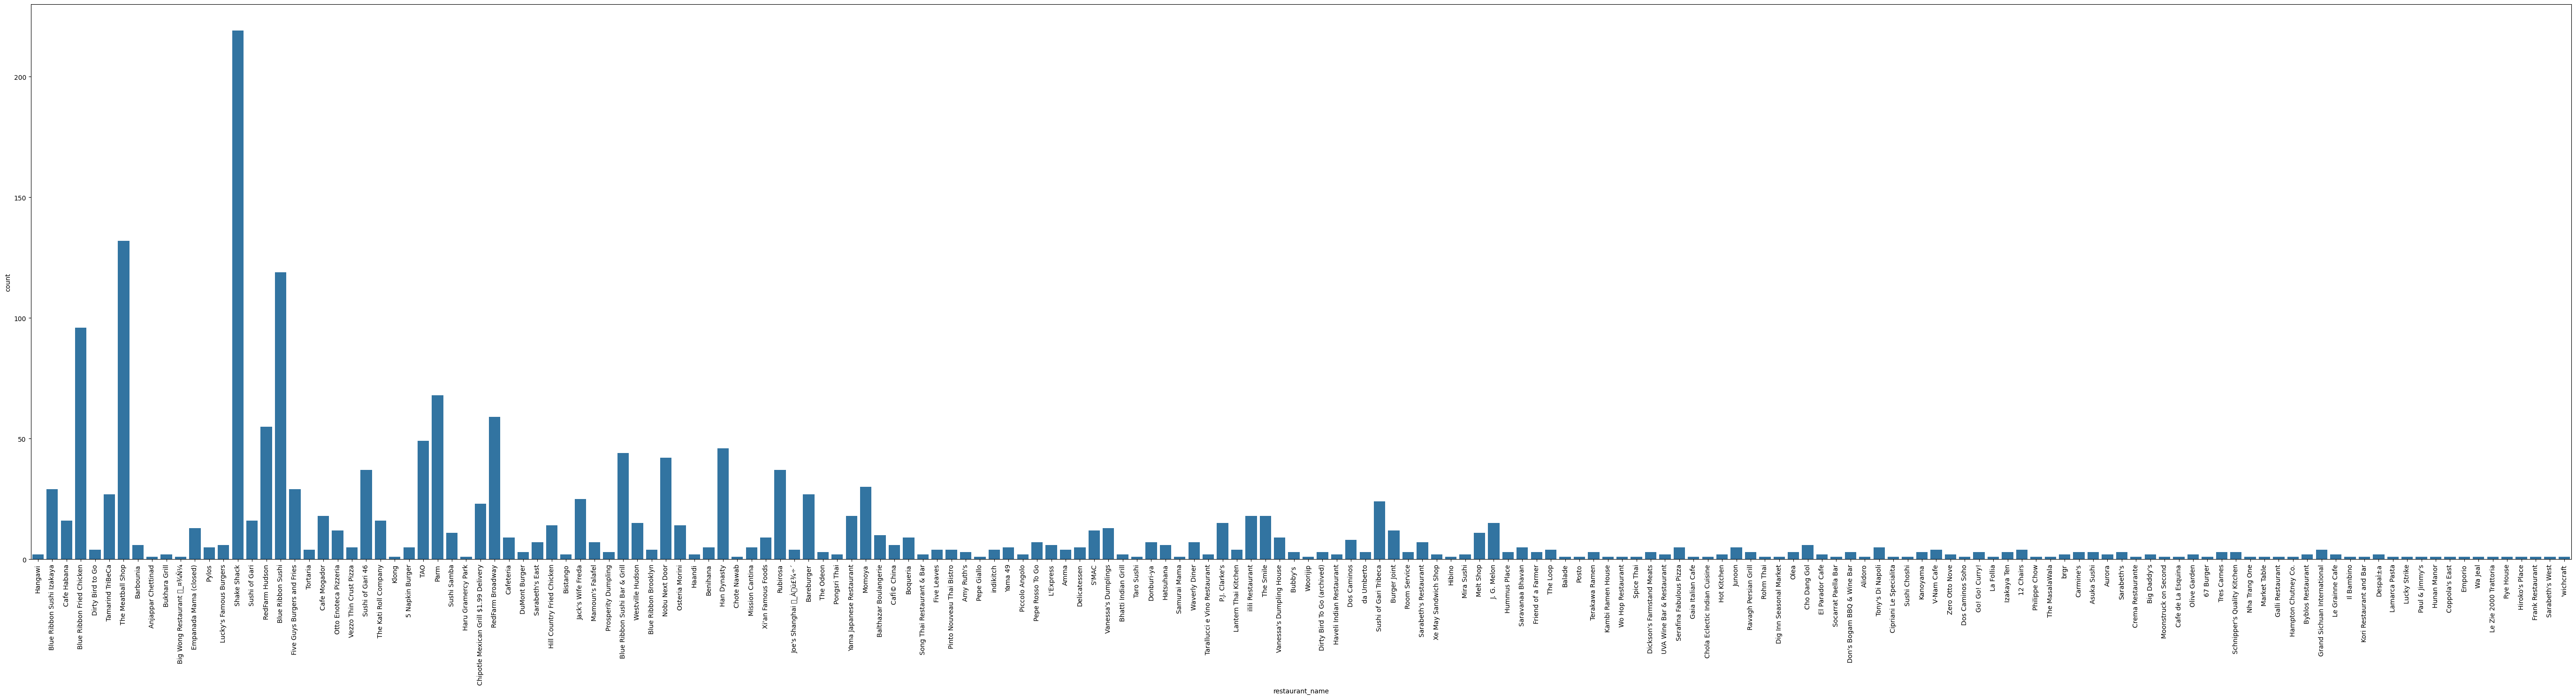

<ipython-input-140-7bcada8dc4af>:10: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-140-7bcada8dc4af>:10: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


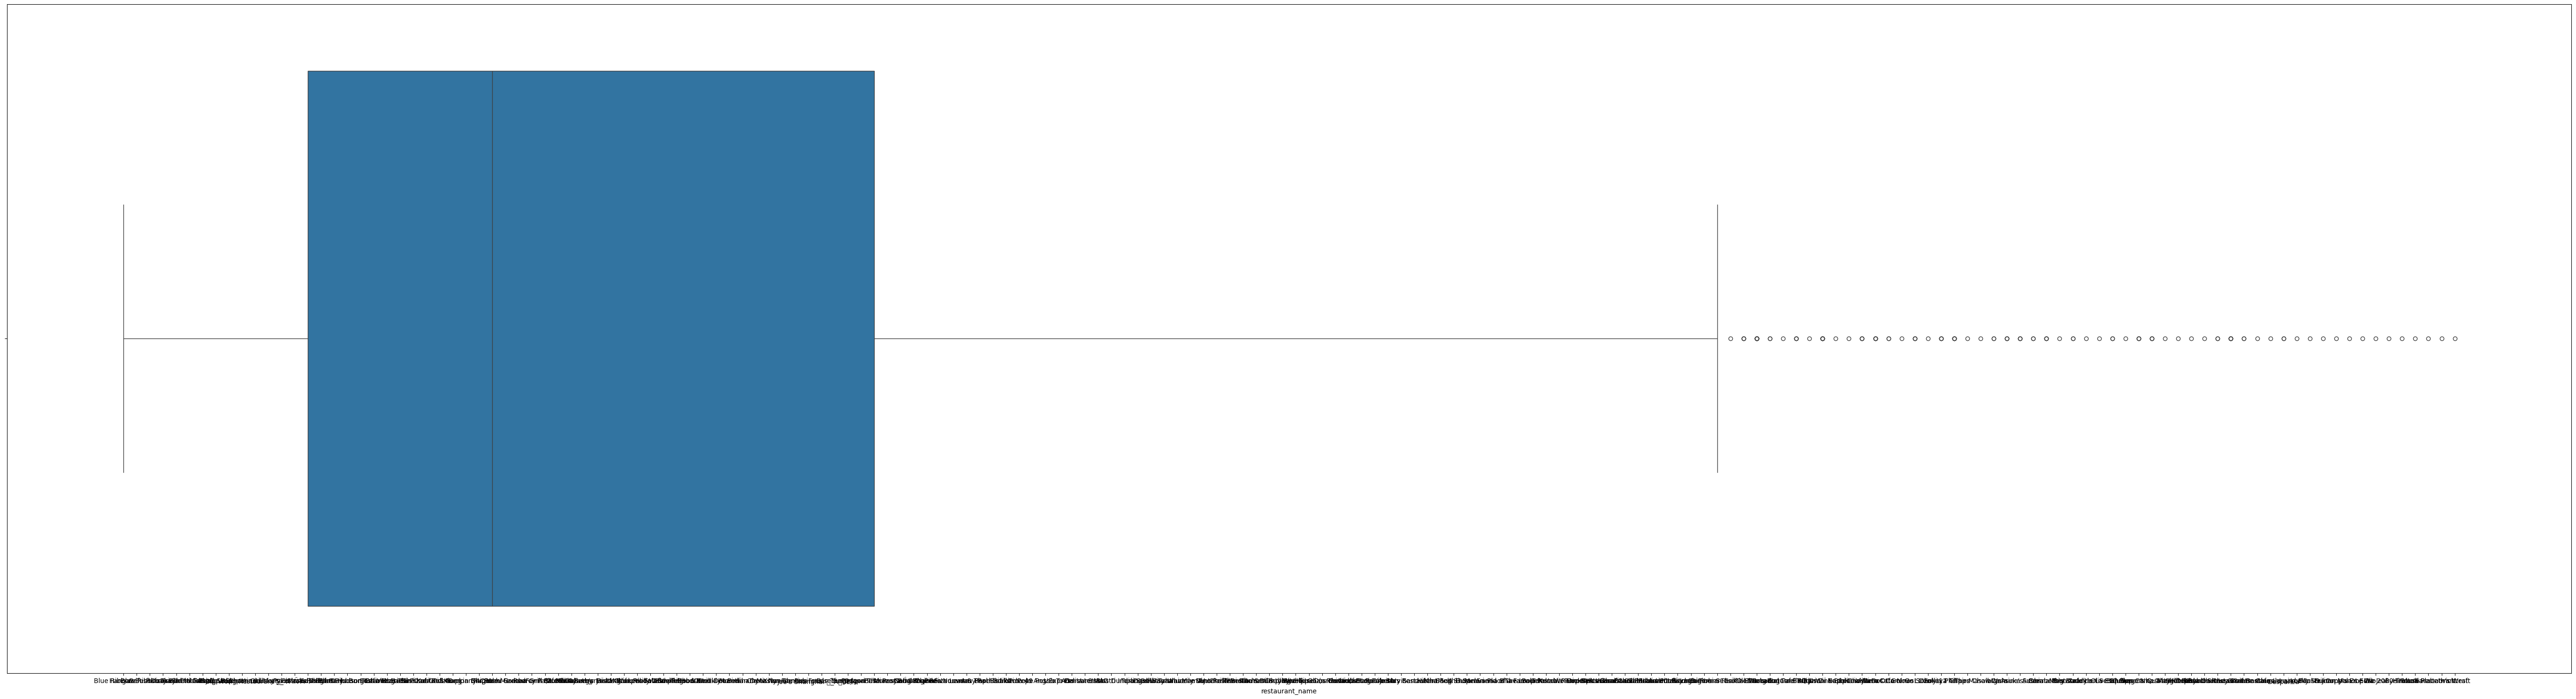

In [ ]:
#Univariate analysis on restaurant_name
df['restaurant_name'].value_counts()
plt.figure(figsize=(55,15))
plt.xticks(rotation=90);
sns.countplot(data=df,x='restaurant_name');
plt.tight_layout()
plt.show()
plt.figure(figsize=(55,15))
sns.boxplot(data=df,x='restaurant_name');
plt.tight_layout()
plt.show()

####Observations on Restaurant:
####ShakeShack restaurant has received highest orders.
####The distribution is highly right-skewed.
####There are so many outliners




> Univariate analysis on cuisine type






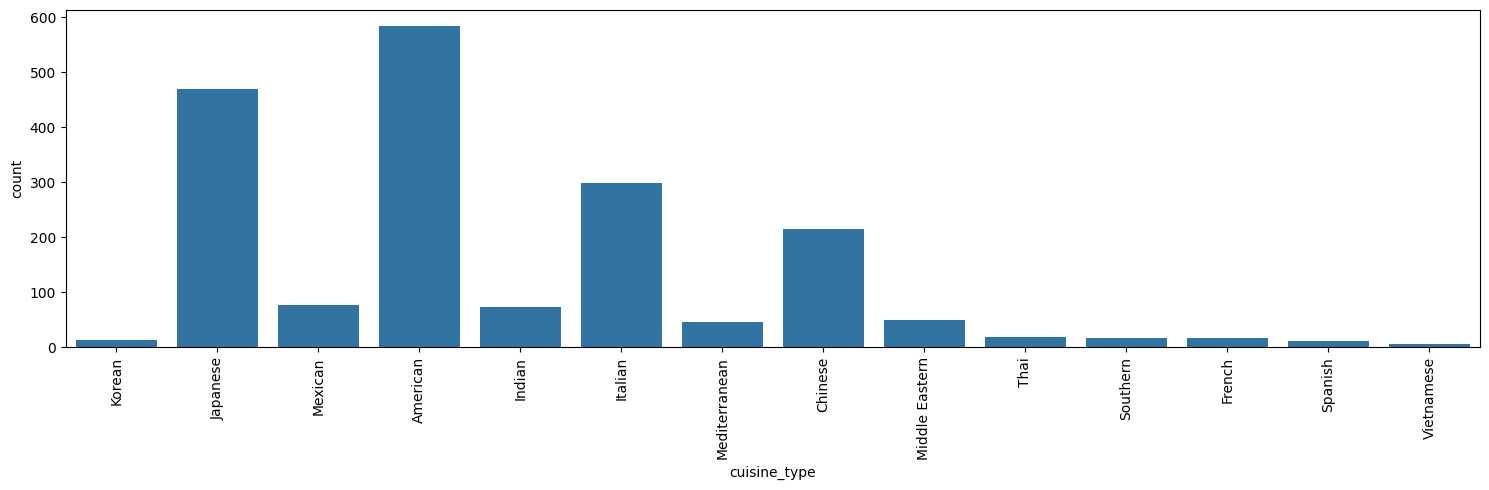

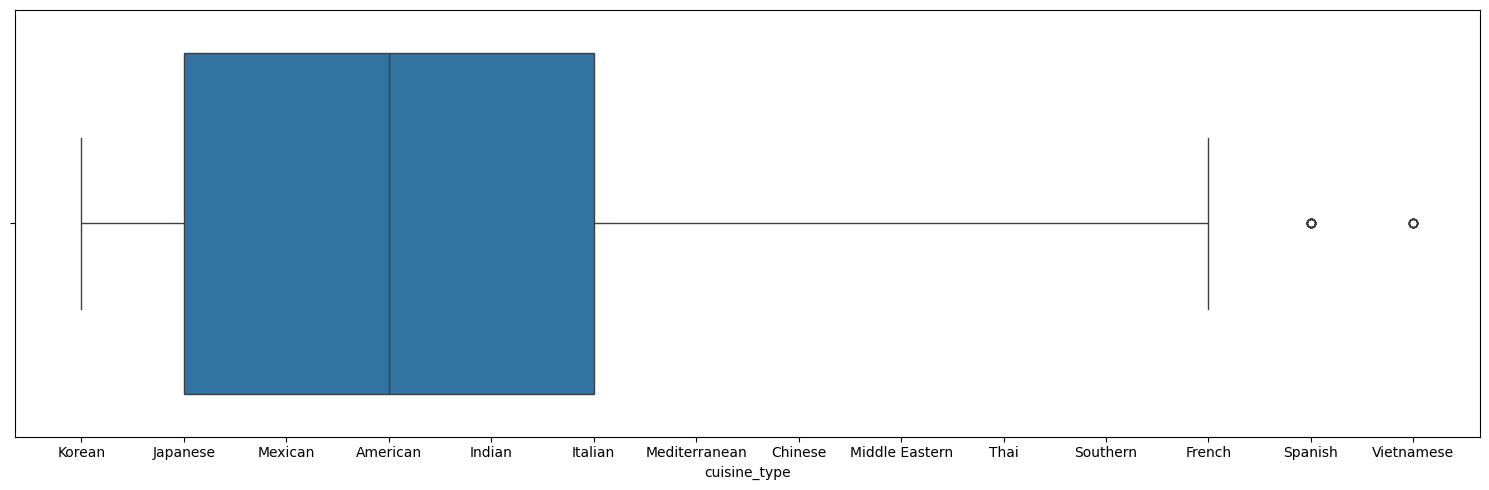

In [ ]:
#Univariate analysis on cusine type
df['cuisine_type'].value_counts()
plt.figure(figsize=(15,5))
plt.xticks(rotation=90);
sns.countplot(data=df,x='cuisine_type');
plt.tight_layout()
plt.show()
plt.figure(figsize=(15,5))
sns.boxplot(data=df,x='cuisine_type');
plt.tight_layout()
plt.show()


####Observations on Cuisine-type:
#### Users have preferred Japenese cusine the most and vietnamese the least.
####The distribution is right-skewed.
####There are so very few outliners




> Univariate analysis on customer_id






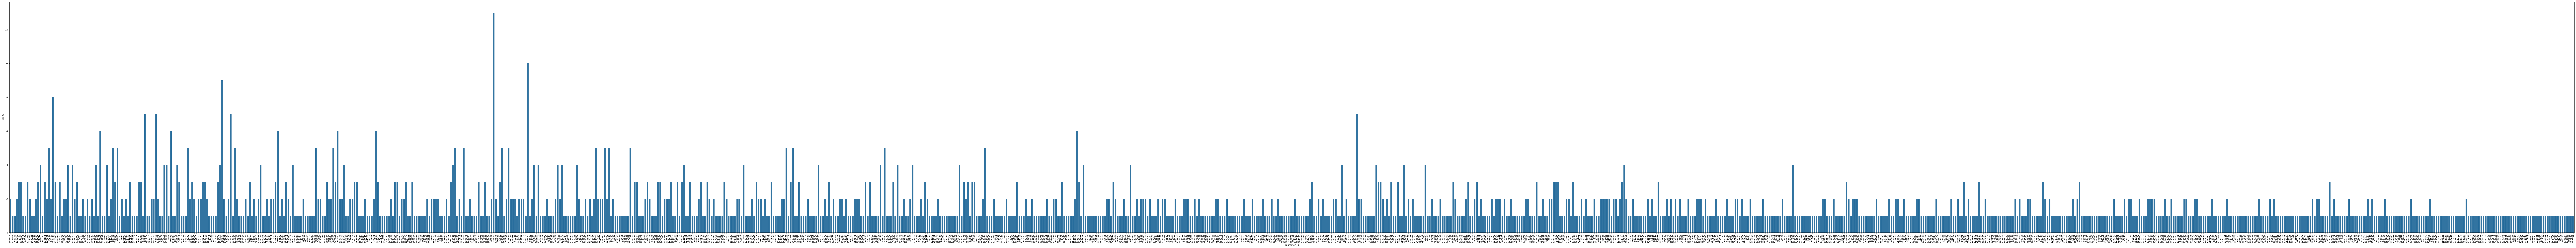

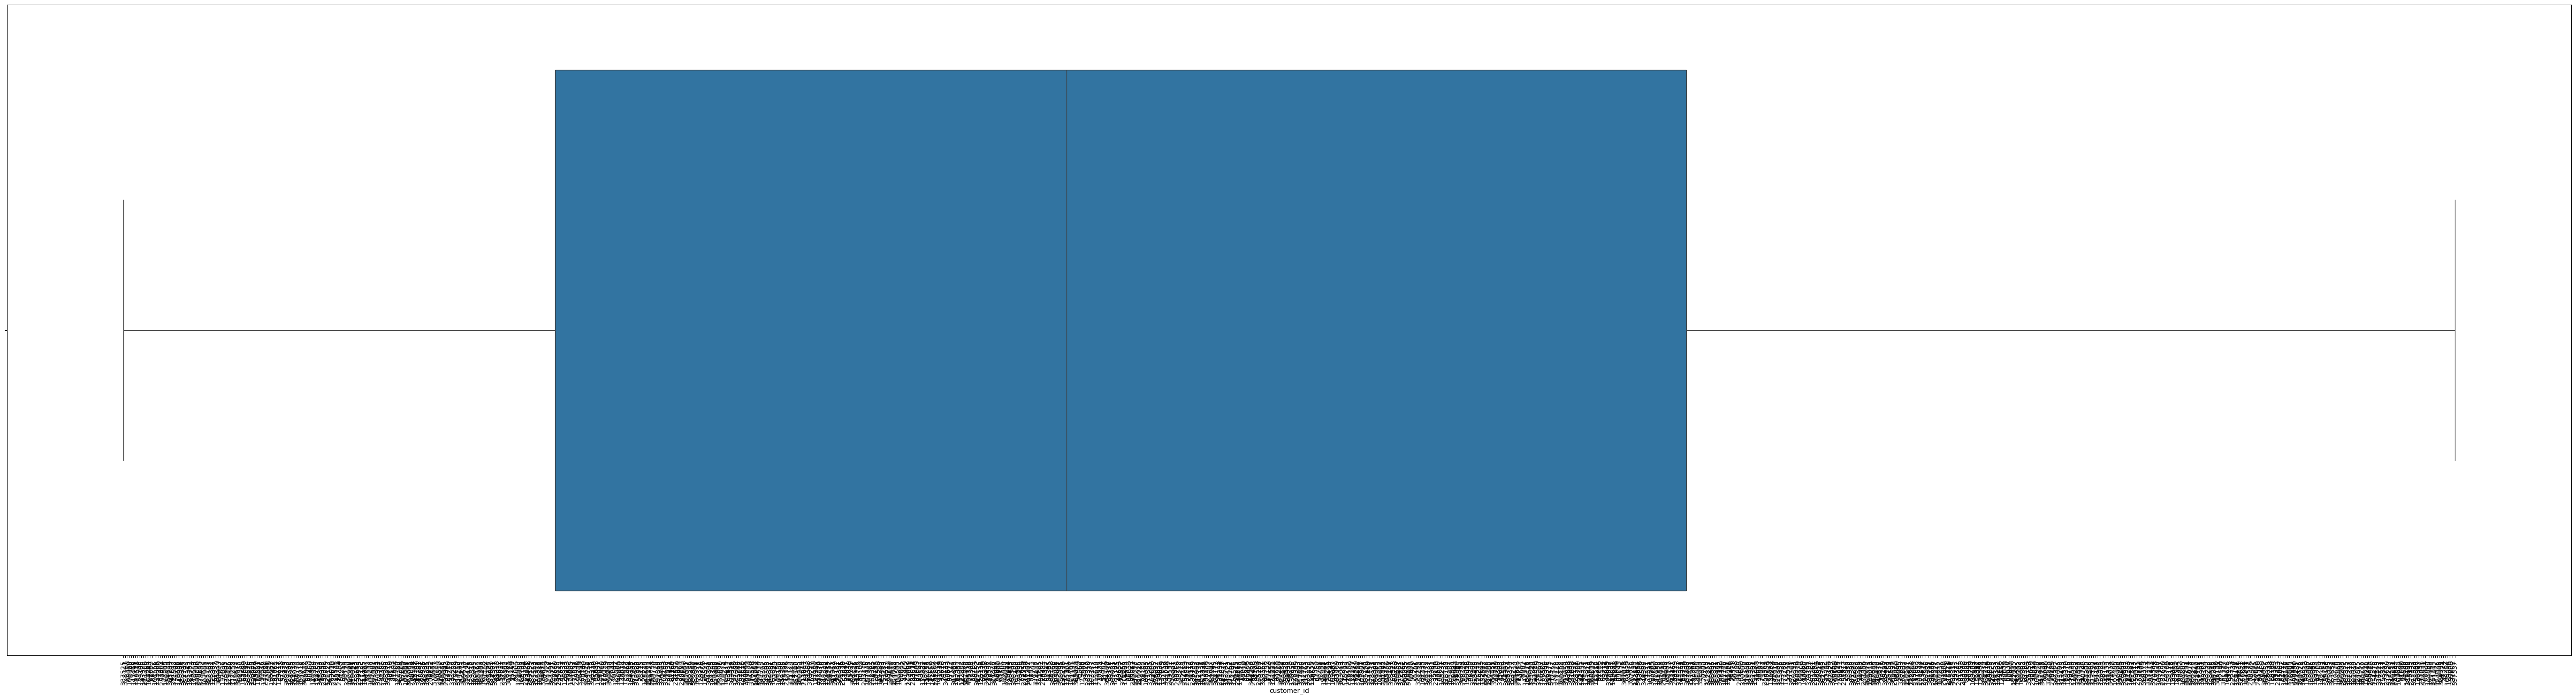

In [ ]:
#Univariate analysis on customer_id
df['customer_id']=df['customer_id'].astype('str')
#print(df['customer_id'].value_counts())
plt.figure(figsize=(155,15))
plt.xticks(rotation=90);
sns.countplot(data=df,x='customer_id');
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
plt.figure(figsize=(55,15))
sns.boxplot(data=df,x='customer_id');
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

####Observations on Customers:
#### User with customer_id 52832 has made highest number of order .
####The distribution is slightly right-skewed as the whiskers on the right is quite bigger than the left.
####There are no outliners




> Univariate analysis on cost of the order






histograms for the cost_of_the_order variables


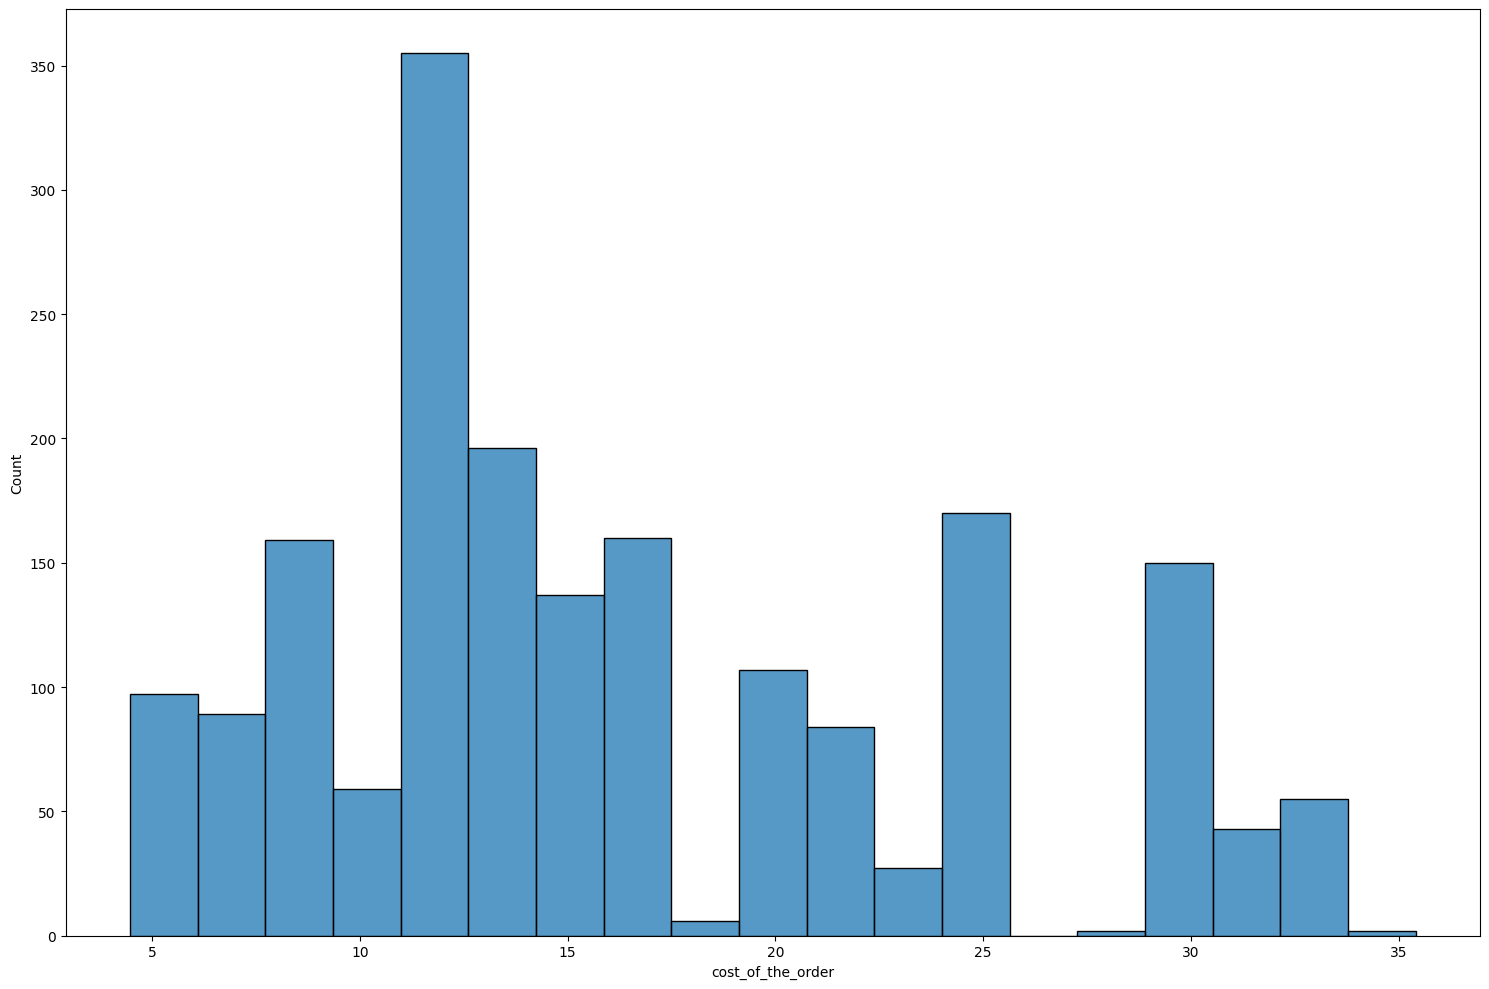



 ----------------------------------------------------------------------------------------------------


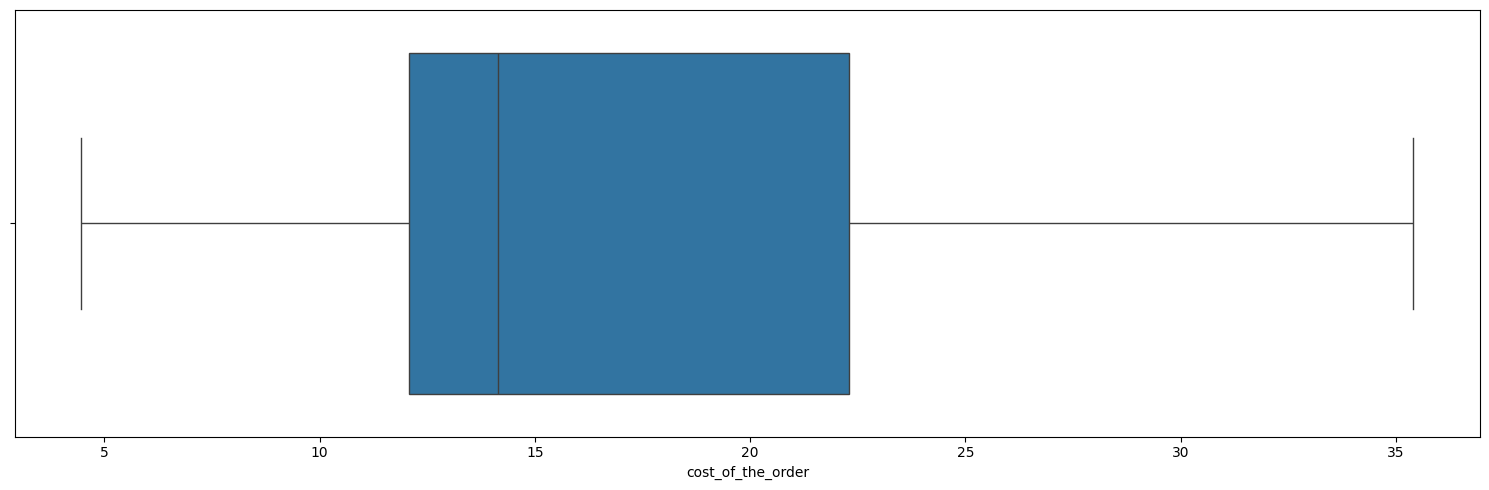



 ----------------------------------------------------------------------------------------------------


In [ ]:
#histogram for cost of the order
print("histograms for the cost_of_the_order variables")
#df['order_id']=df['order_id'].astype('int64')
#plt.figure(figsize=(15,5))
#numerical_columns=['cost_of_the_order','food_preparation_time','delivery_time']
plt.figure(figsize=(15,10))
sns.histplot(data=df,x='cost_of_the_order')
plt.tight_layout()
plt.show()
print('\n\n','-'*100)

# Box plots for cost_of_the_order
plt.figure(figsize=(15,5))
sns.boxplot(data=df,x='cost_of_the_order');
plt.tight_layout()
plt.show()
print('\n\n','-'*100)


####Observations on Cost of the order
#####The distribution for the cost of the order is right skewed.
#####There are no outliers
#####Minimum order value is less than 5. Maximum order value is more than 35



> Univariate analysis on days of the week






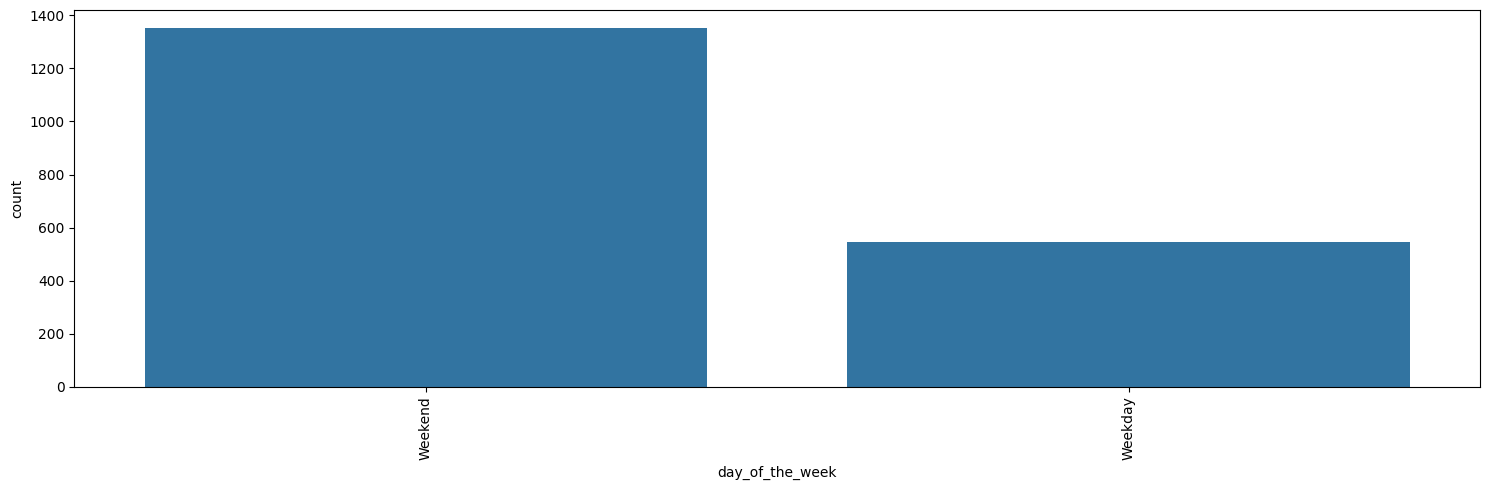

In [ ]:
#Univariate analysis on days of the week
plt.figure(figsize=(15,5))
plt.xticks(rotation=90);
sns.countplot(data=df,x='day_of_the_week');
#plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

####Observations on days of the week
#####Most of the orders are on Weekends than weekdays



> Univariate analysis on rating






rating
NaN    736
5.0    588
4.0    386
3.0    188
Name: count, dtype: int64


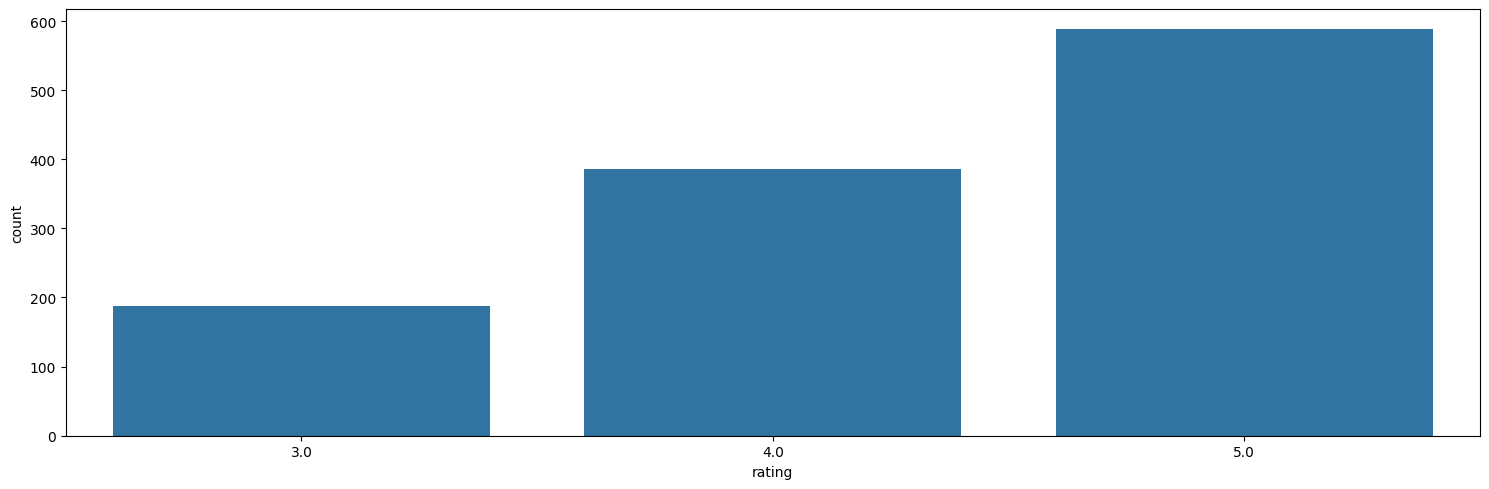

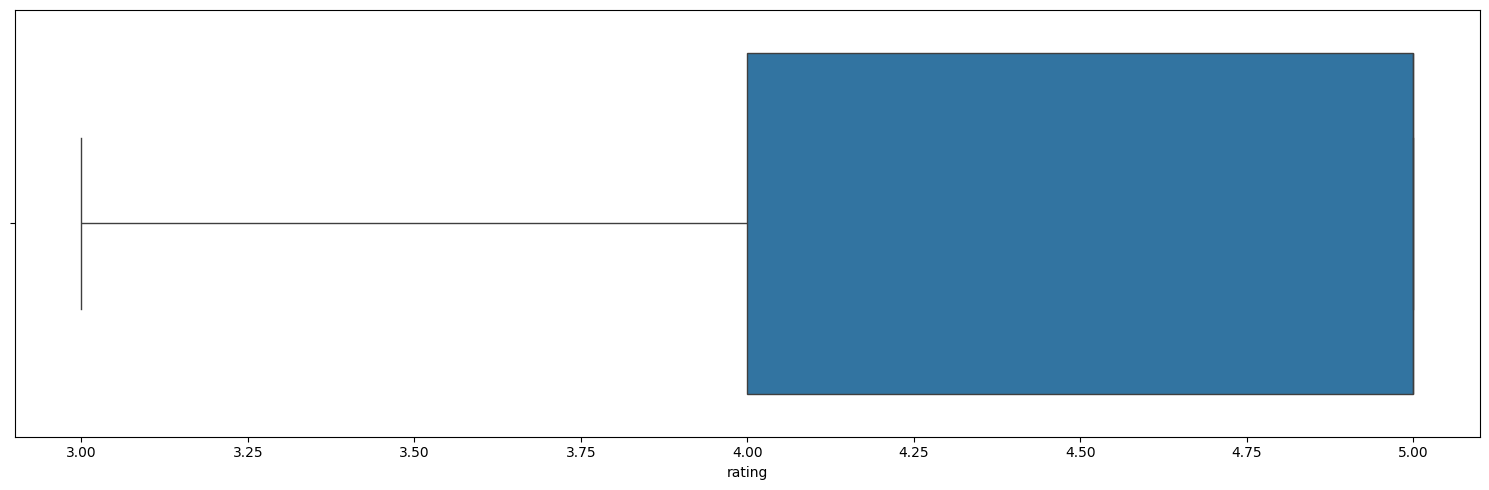



 ----------------------------------------------------------------------------------------------------


In [ ]:
#Univariate analysis on rating
df['rating']=df['rating'].replace('Not given',np.nan)
df['rating']=df['rating'].astype('float')
print(df['rating'].value_counts(dropna=False))
plt.figure(figsize=(15,5))
#plt.xticks(rotation=90);
sns.countplot(data=df,x='rating');
#plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Box plots for cost_of_the_order
plt.figure(figsize=(15,5))
sns.boxplot(data=df,x='rating');
plt.tight_layout()
plt.show()
print('\n\n','-'*100)

####Observations on rating
##### *The distribution is left skewed.*
##### *The minimum rating is 3*
##### *The maximum rating is 5*


####Univariate analysis on food_preparation_time

histograms for the food_preparation_time


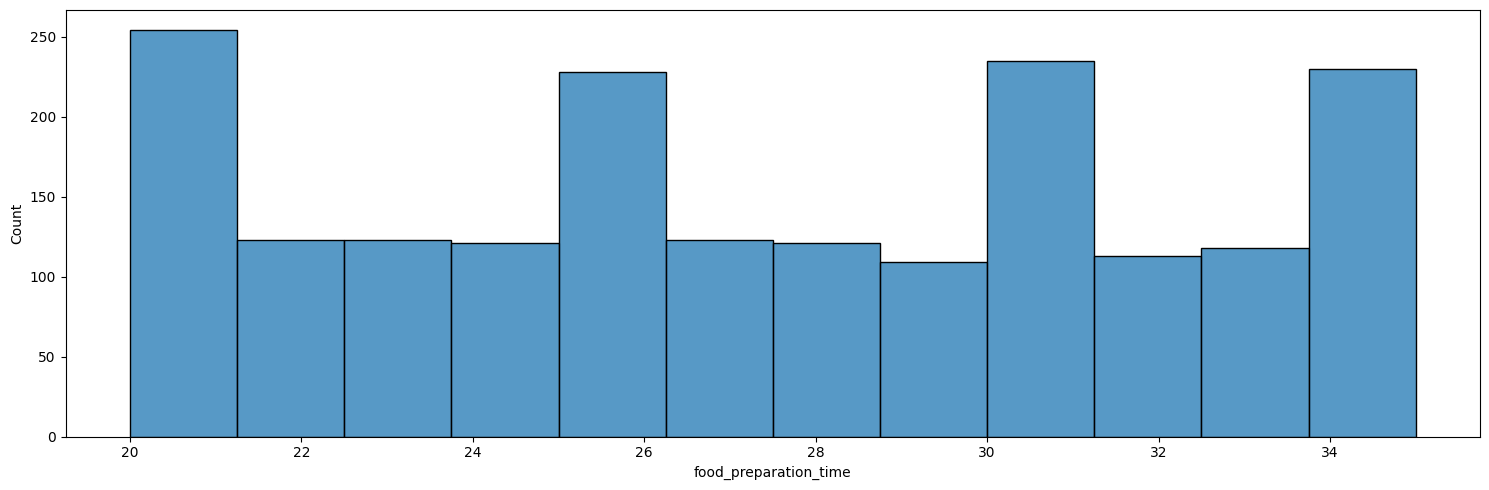



 ----------------------------------------------------------------------------------------------------

Box plot for the food_preparation_time



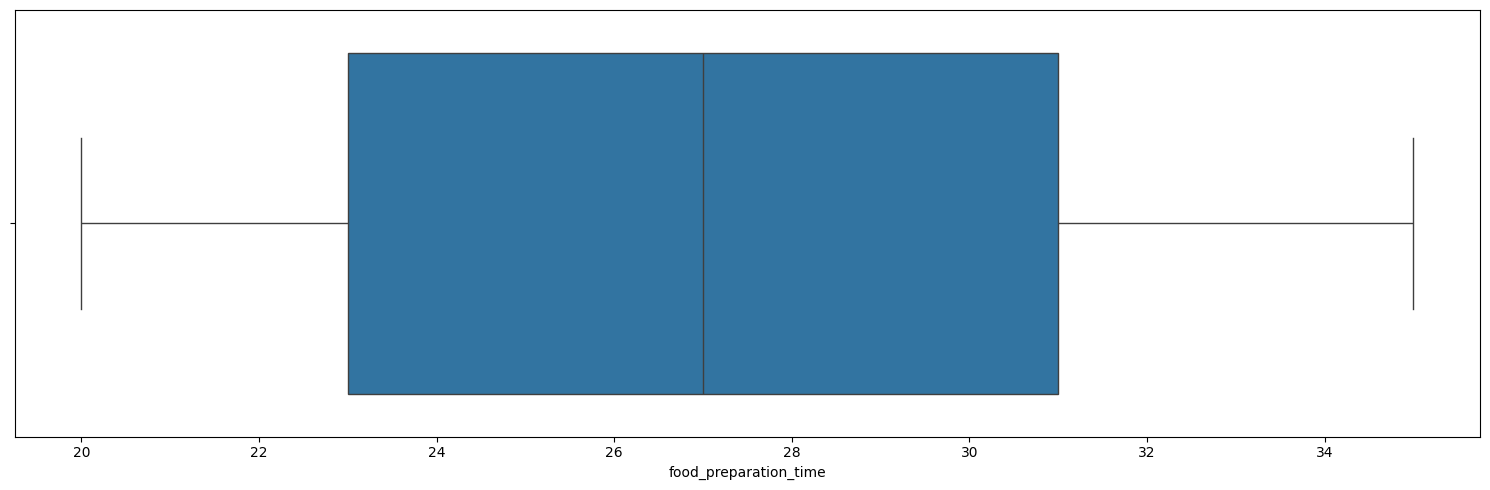

In [ ]:

#histogram for food_preparation_time
print("histograms for the food_preparation_time")
#plt.figure(figsize=(15,5))
plt.figure(figsize=(15,5))
sns.histplot(data=df,x='food_preparation_time')
plt.tight_layout()
plt.show()
print('\n\n','-'*100)

# Box plots for food_preparation_time
plt.figure(figsize=(15,5))
print("\nBox plot for the food_preparation_time\n")
sns.boxplot(data=df,x='food_preparation_time');
plt.tight_layout()
plt.show()
#print('\n\n','-'*100)


####Observations on rating
##### *The distribution seems normal distribution. The lenth of the whiskers are quite the same.*
##### *The minimum prep time is 20*
##### *The maximum prep time is ~35*



histograms for the delivery_time


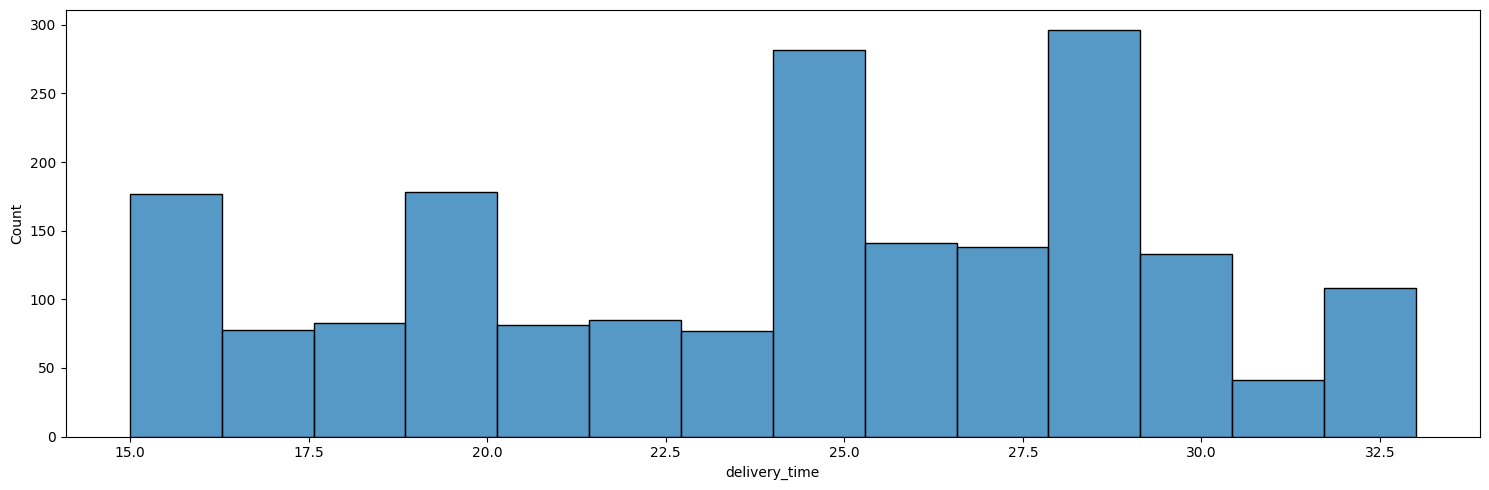



 ----------------------------------------------------------------------------------------------------

Box plot for the delivery_time



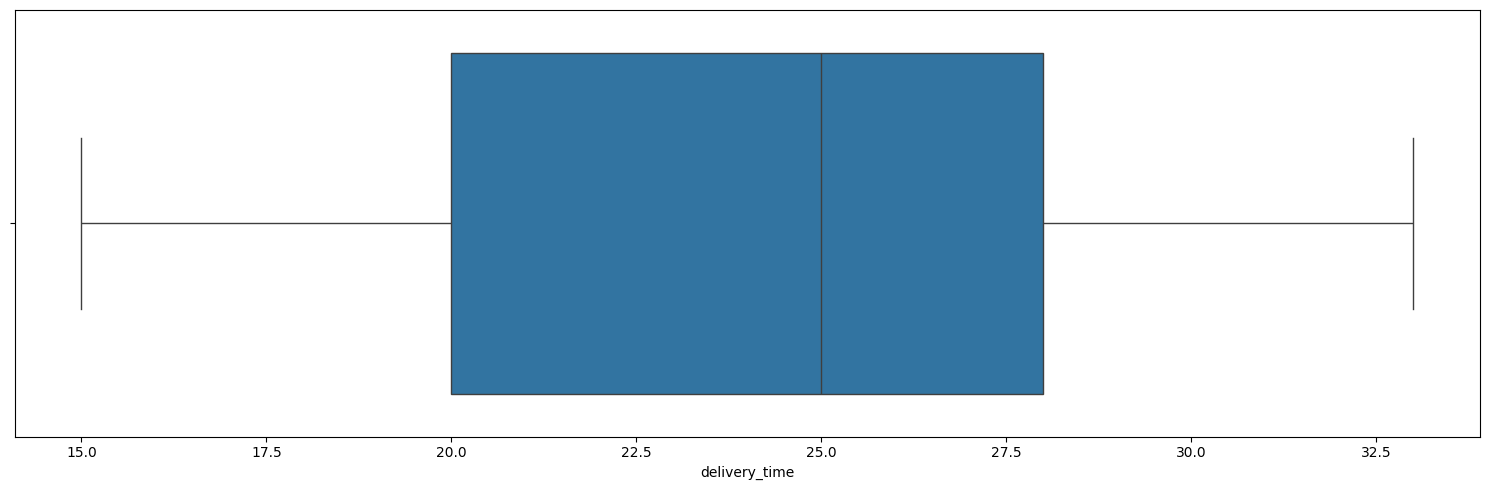

In [ ]:

#histogram for delivery_time
print("histograms for the delivery_time")
#plt.figure(figsize=(15,5))
plt.figure(figsize=(15,5))
sns.histplot(data=df,x='delivery_time')
plt.tight_layout()
plt.show()
print('\n\n','-'*100)

# Box plots for delivery_time
plt.figure(figsize=(15,5))
print("\nBox plot for the delivery_time\n")
sns.boxplot(data=df,x='delivery_time');
plt.tight_layout()
plt.show()
#print('\n\n','-'*100)


####Observations on rating
##### *The distribution is left skewed as the whiskers on the left is longer than the right.
##### *The minimum delivery time is 15*
##### *The maximum delivery time is ~33*



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
df['restaurant_name'].value_counts(ascending=False).head(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:



*The top 5 restaurant with highest orders are,*

1.   Shake Shack
2.   The Meatball Shop
3.   Blue Ribbon Sushi
4.   Blue Ribbon Fried Chicken
5.   Parm





### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
df[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts().head(5)

,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53


#### Observations:
*The most popular cusine during the weekends is American with 415 orders during weekend.*


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
df[df['cost_of_the_order']>20].value_counts().sum()/df.shape[0]*100

np.float64(18.75658587987355)

#### Observations:

*18.5% of the orders cost more than 20 dollars.*


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
df['delivery_time'].mean()

np.float64(24.161749209694417)

#### Observations:
*Mean of delivery_time is 24.16 minutes.*


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:

*The top 3 customers with highest number of orders are,*



1. Customer ID 52832	with 13 orders
2. Customer ID 47440	with 10 orders
3. Customer ID 83287	with 9 orders





### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


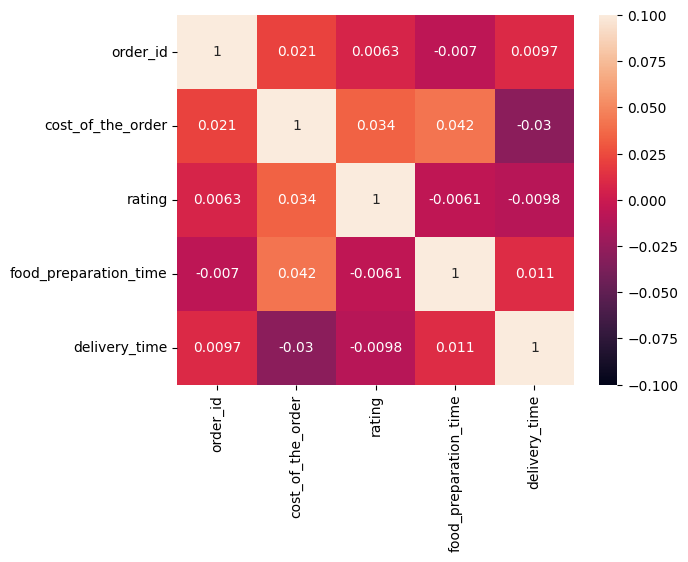

In [ ]:
# Write the code here
corr_index=df.corr(numeric_only=True)
sns.heatmap(corr_index,annot=True,vmin=-0.1,vmax=0.1)
plt.show()

#### Observations:

* *The most positive correlation is between cost_of_the_order and
food_preparation time.*
* *If the cost of the order is more the time taken to prepare the food is also more.*
* *The most negative correlation is between the delivery time and the rating*
* *If the delivery time is longer, the rating is likely to be low*






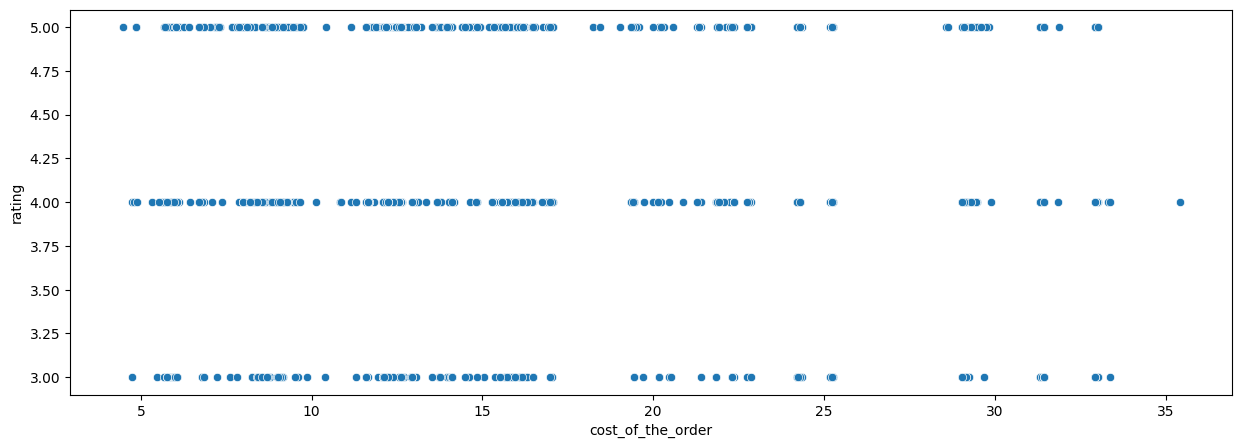

In [ ]:
#scatter plot
plt.figure(figsize=(15,5))
sns.scatterplot(data=df,x='cost_of_the_order',y='rating')
plt.show()



#### Observations:

* *The cost of the order does not seem to have much impact on the rating.*
* *There is not much correlation between these variables*






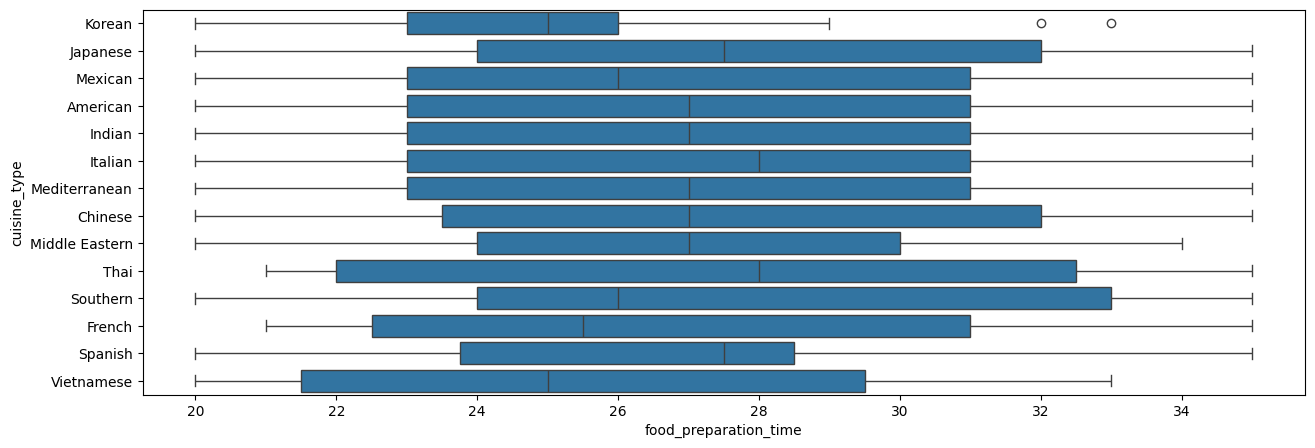

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df,x='food_preparation_time',y='cuisine_type')
plt.xlabel='food_preparation_time_in_mins'
plt.show()

#### Observations:

*This box plot helps to analyse the preparation time against the cuisine type. How fast or how longer each cuisine can take for the order to be prepared*

* *Irrespective of cuisine type, it take atleast 20mins to prepare the order.*
* *Thai and French cuisine cannot be the quickest meal as their minimum preparation time is longer than the others*
* *75% of Korean cuisine can be prepared in less than 26mins.*
* *Korean cuisines have outliners.*
* *Middle eastern cusine takes maximum of 35 mins to prepare.*
* *American, Indian, Meditteranean show similar prep time trends.







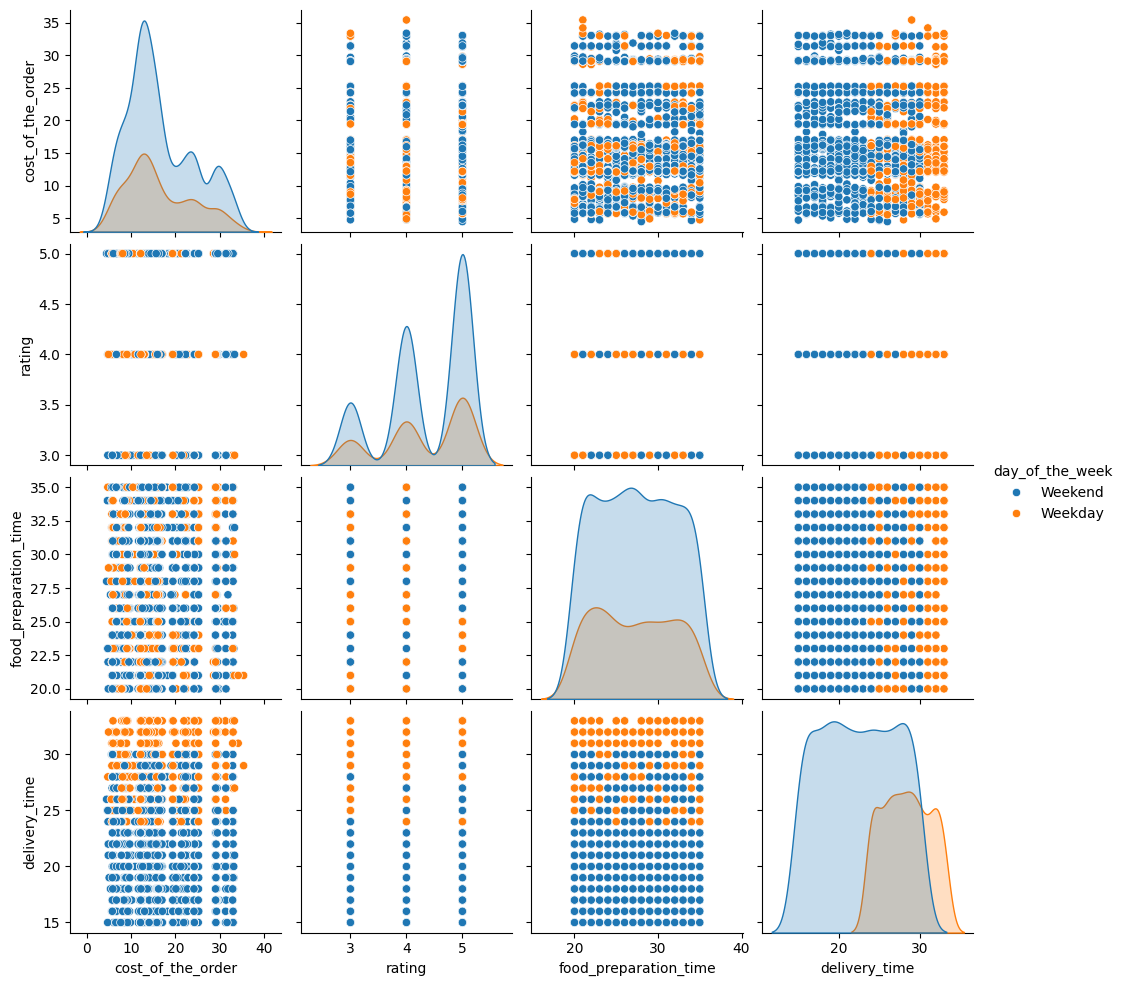

In [ ]:
sns.pairplot(data=df[['cost_of_the_order','rating','food_preparation_time','delivery_time','day_of_the_week']],hue='day_of_the_week')
plt.show()



#### Observations:
1.  *The delivery time is maximum 26 during the weekday.*
2.  *The cost of the order is higher during the weekends.*
3.  *The food prep time and delivery time are higher during the weekend.*
4. There is no highly positive or highly negative correlation between the features.

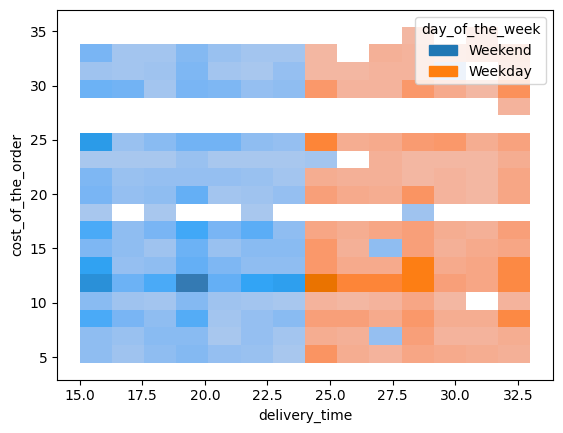

In [ ]:
sns.histplot(data=df,x='delivery_time',y='cost_of_the_order',hue='day_of_the_week',kde=True)
plt.show()

#### Observations:
1.  *Irrespective of the cost of the order, the delivery time is generally high during the weekends.*

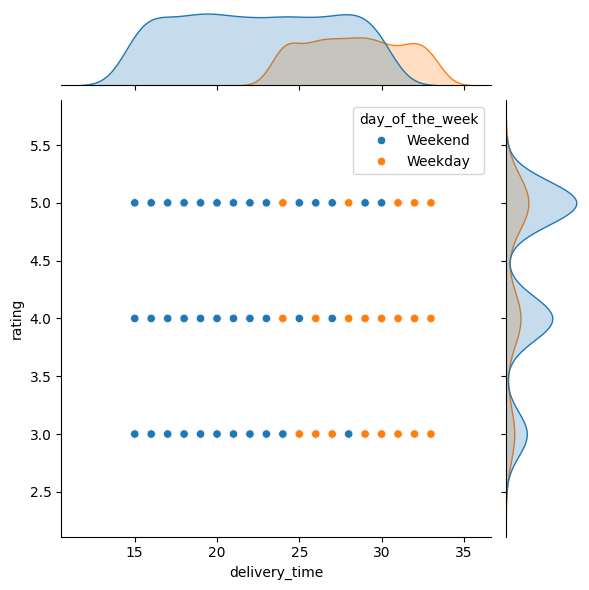

In [ ]:
sns.jointplot(data=df,x='delivery_time',y='rating',hue='day_of_the_week')
plt.show()

#### Observations:
1.  *Irrespective of the cost of the order, the delivery time is generally high during the weekends.*
2. *Irrespective of the weekday/weekend, the rating doesnot change much.*

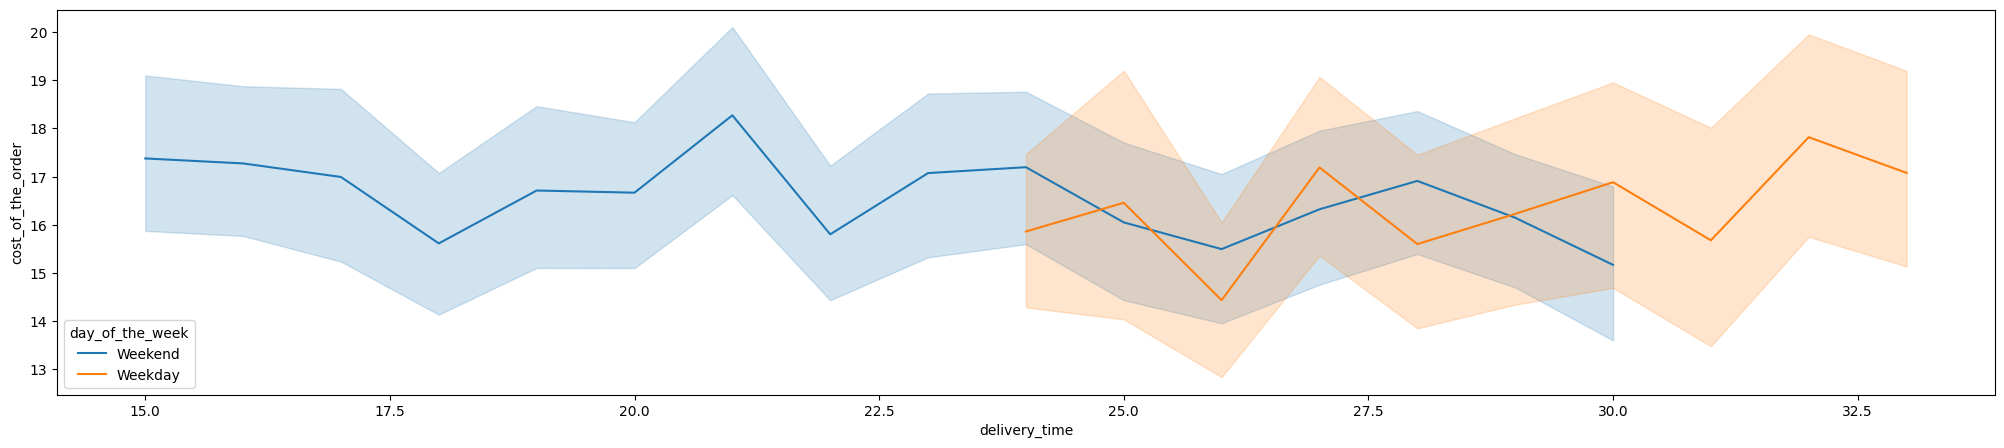

In [ ]:
plt.figure(figsize=(25,5))
sns.lineplot(data=df,x='delivery_time',y='cost_of_the_order',hue='day_of_the_week')
plt.show()

#### Observations:
1.  *There is not much correlation between the cost of the order and the delivery time.*

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here
restaurant_rating=df.groupby('restaurant_name')['rating'].count()
average_rating=df.groupby('restaurant_name')['rating'].mean()
promotional_restaurant = restaurant_rating[(restaurant_rating > 50) & (average_rating > 4)].index
print(promotional_restaurant)



Index(['Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shack',
       'The Meatball Shop'],
      dtype='object', name='restaurant_name')


#### Observations:

The restaurants eligible for the promotional offers are,
* *Blue Ribbon Fried Chicken*
* *Blue Ribbon Sushi*
* *Shake Shack*
* *The Meatball Shop*


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
df['revenue']=df.apply(lambda x:x['cost_of_the_order']*0.25 if x['cost_of_the_order']>20 else x['cost_of_the_order']*0.15 if x['cost_of_the_order']>5 else 0,axis=1)
print(df['revenue'].sum())

6166.303


#### Observations:
The net revenue generated by the company is $6166.303

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
df['total_time_required']=df['food_preparation_time']+df['delivery_time']
restaurant_total_time = df[df['total_time_required']>60]
#print(restaurant_total_time.shape[0])
#print(df.shape[0])
print('percentage of orders take more than 60 minutes to get delivered from the time the order is placed: ',restaurant_total_time.shape[0]*100/df.shape[0])

percentage of orders take more than 60 minutes to get delivered from the time the order is placed:  10.53740779768177


#### Observations:
Percentage of orders take more than 60 minutes to get delivered from the time the order is placed:  10.53740779768177

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
df.groupby('day_of_the_week')['delivery_time'].mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:
The mean of delivery time for,
* Weekday is 28.34
* Weekend is 22.47


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

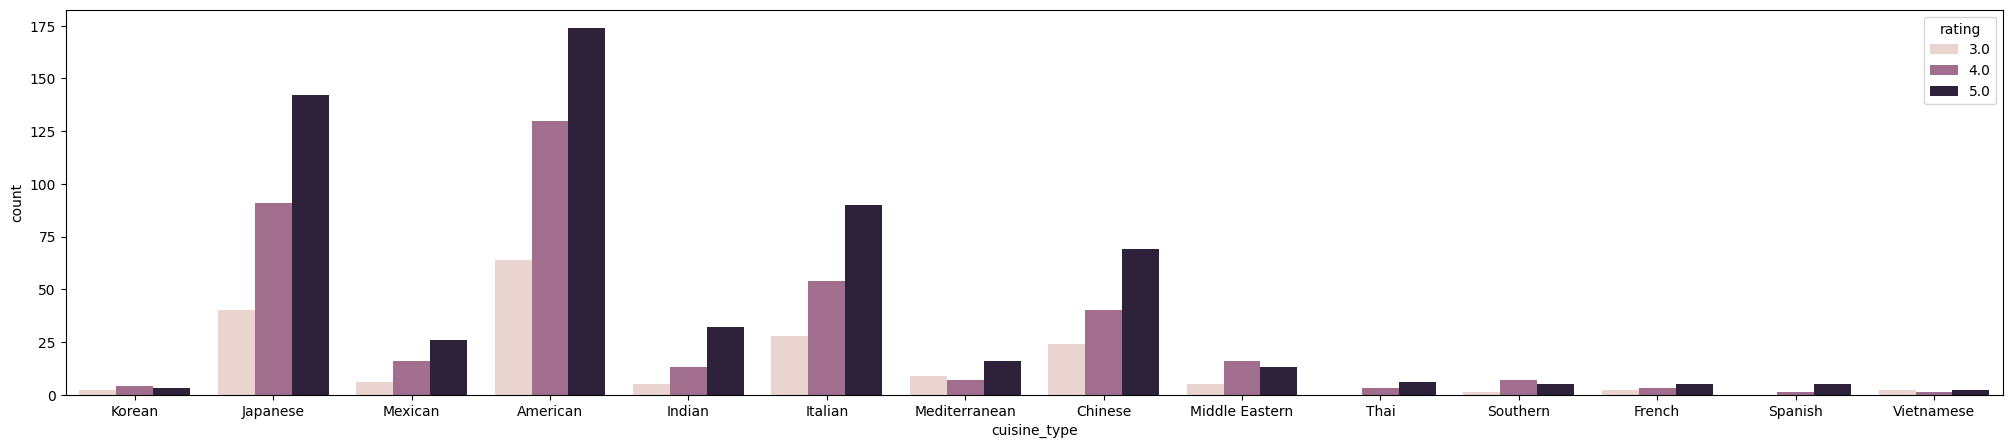

In [ ]:
plt.figure(figsize=(25,5))
sns.countplot(data=df,x='cuisine_type',hue='rating')
plt.show()

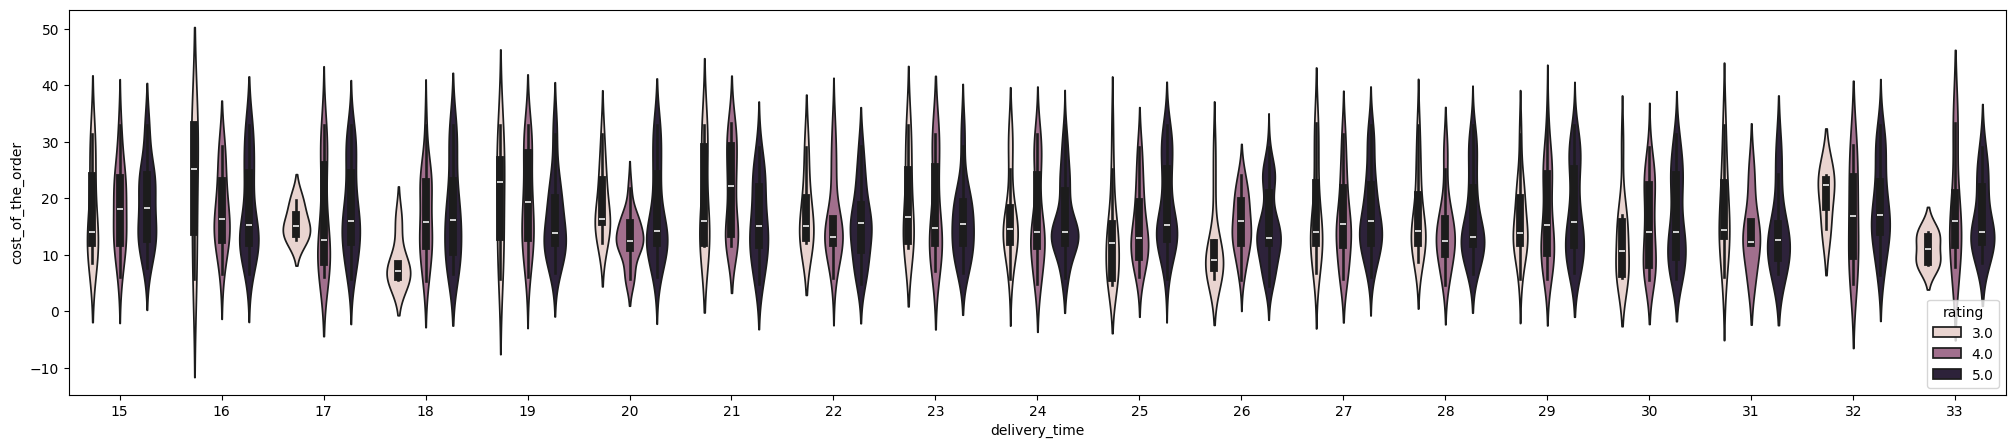

In [ ]:
plt.figure(figsize=(25,5))
sns.violinplot(data=df,x='delivery_time',y='cost_of_the_order',hue='rating')
plt.show()

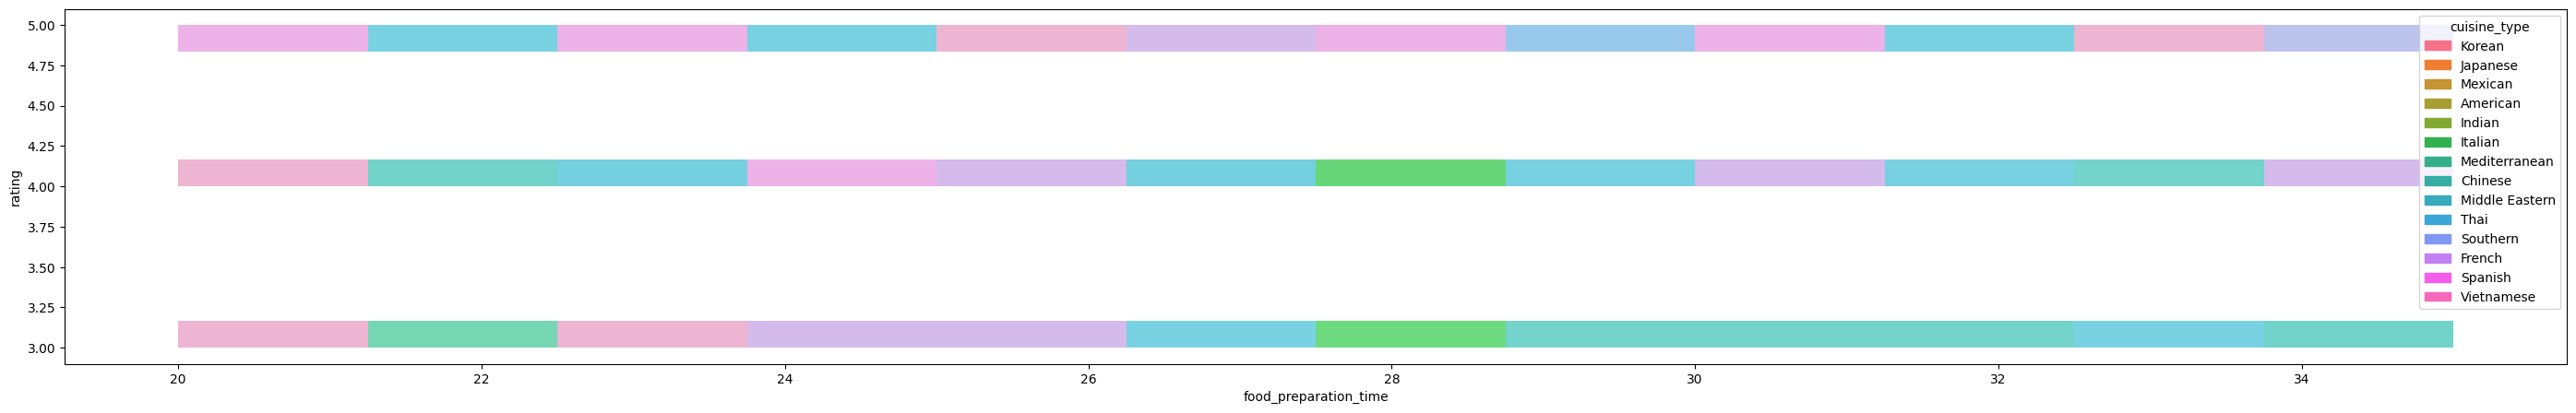

In [ ]:
plt.figure(figsize=(35,5))
sns.histplot(data=df,x='food_preparation_time',y='rating',hue='cuisine_type')
plt.show()

### Conclusions:
* People love American, Japanese, Italian and Chinese. We can work to expand the menu to increase revenue.
* People preferred Vietnamese, Korean, Thai cuisines the least.
* The majority of ratings are high(4 or 5), suggesting that customers are generally satisfied with their orders.
* Middle eastern, Southern, Korean cuisines have less 5 ratings than 4 ratings.
* The delivery time cannot be the only factor for receiving 3 rating.
* When Chinese and thai cuisine take longer time to prepare, the ratings are 3.
* When French cuisine takes longest time to prepare food, it gets 4 and 5 ratings.
* There is a wide range of preparation and delivery times, with some taking as little as 20 minutes and others up to 35 minutes or more.
* Orders are fairly distributed between weekdays and weekends, with a slight increase in weekend orders.

### Recommendations:

* People didn't prefer Asian cuisine types like Korean, Vietnamese, Thai. Need attention to promote them and make people try those cuisines.
* Despite good rating average, French and Spanish cuisines are not so popular. They need promotions to improve business.
* We can work on improving the delivery time and food preparation time.
* There are many customers who did not proving rating. We can encourage customers to provide rating.